In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('gym_members_exercise_tracking.csv')

Parte 2

In [8]:
# 1. Revisar estructura del dataset
print("Información del dataset:")
df.info()
print("\nPrimeras filas del dataset:")
print(df.head())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/w

In [9]:
# 2. Estadísticas descriptivas para variables numéricas
print("\nEstadísticas descriptivas:")
print(df.describe())



Estadísticas descriptivas:
              Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419   
min      50.00000

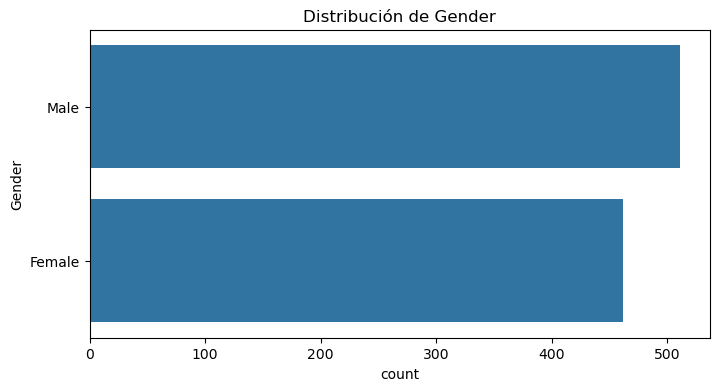

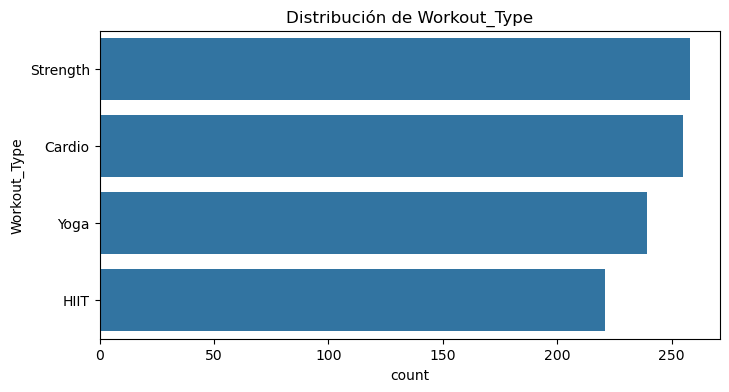

In [10]:
# 3. Distribución de categorías principales
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.show()

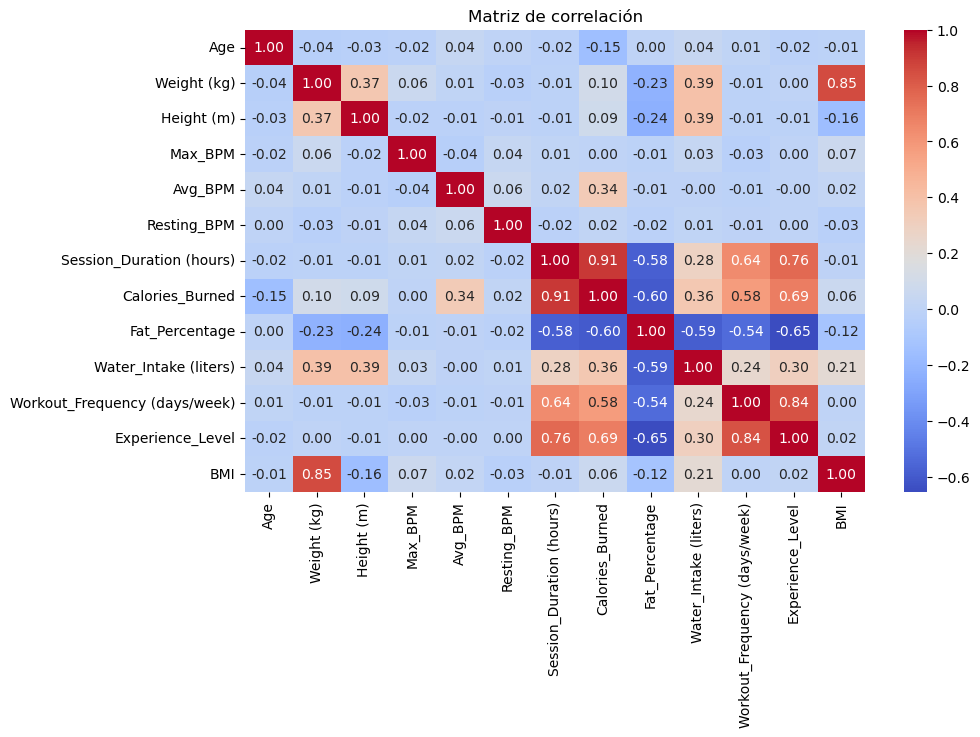

In [12]:
numeric_df = df.select_dtypes(include=['number'])  # Filtrar solo columnas numéricas
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de correlación")
plt.show()

Parte 3

In [15]:
# Cálculo de probabilidad de ocurrencia por categoría seleccionada
category = df['Workout_Type']
category_probs = category.value_counts(normalize=True)

In [16]:
# Generación de un nuevo dataset expandido
expanded_data = []

for workout_type, prob in category_probs.items():
    # Número de registros a generar basados en la probabilidad
    num_records = int(prob * 100000)  # Ajustamos a 100,000 registros en total
    
    # Simulación de nuevos registros
    simulated_rows = df[df['Workout_Type'] == workout_type].sample(num_records, replace=True)
    expanded_data.append(simulated_rows)

expanded_df = pd.concat(expanded_data, axis=0)

In [17]:
for col in ['Calories_Burned', 'BMI']:
    original_values = df[col]
    expanded_values = np.random.normal(original_values.mean(), original_values.std(), len(expanded_df))
    expanded_df[col] = np.clip(expanded_values, original_values.min(), original_values.max())  # Ajustamos a rango original

In [18]:
# Resultados de simulación
print("Dataset expandido generado con éxito:")
print(expanded_df.head())

Dataset expandido generado con éxito:
     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
355   33    Male        113.6        1.99      169      125           58   
850   48  Female         69.1        1.60      191      166           53   
107   54    Male         86.0        1.93      171      163           51   
871   32    Male         49.3        1.62      167      158           74   
658   43  Female         53.1        1.59      187      136           72   

     Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
355                      1.38      1005.909332     Strength            28.4   
850                      1.34       968.071120     Strength            26.1   
107                      1.74       508.234653     Strength            12.9   
871                      1.18       809.200282     Strength            29.3   
658                      0.82       668.511962     Strength            29.5   

     Water_Intake (liters)  Wo

In [19]:
# Verificar el tamaño del dataset expandido
print(f"Registros totales en el dataset expandido: {expanded_df.shape[0]}")


Registros totales en el dataset expandido: 99998


In [35]:
# Eliminación de valores atípicos usando rango intercuartílico (IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Aplicamos la función para las variables numéricas seleccionadas
numeric_cols = ['Calories_Burned', 'BMI', 'Session_Duration (hours)']
for col in numeric_cols:
    expanded_df = remove_outliers(expanded_df, col)

In [36]:
# Verificamos el dataset después de eliminar valores atípicos
print("Dataset después de eliminar valores atípicos:")
print(expanded_df.describe())
print(f"Registros totales tras la eliminación de outliers: {expanded_df.shape[0]}")

Dataset después de eliminar valores atípicos:
                Age   Weight (kg)    Height (m)       Max_BPM       Avg_BPM  \
count  99240.000000  99240.000000  99240.000000  99240.000000  99240.000000   
mean      38.662807     73.724282      1.721636    179.924426    143.770304   
std       12.174144     21.129008      0.127583     11.520525     14.332791   
min       18.000000     40.000000      1.500000    160.000000    120.000000   
25%       28.000000     58.100000      1.620000    170.000000    131.000000   
50%       40.000000     69.900000      1.710000    180.000000    143.000000   
75%       50.000000     85.900000      1.800000    190.000000    156.000000   
max       59.000000    129.900000      2.000000    199.000000    169.000000   

        Resting_BPM  Session_Duration (hours)  Calories_Burned  \
count  99240.000000              99240.000000     99240.000000   
mean      62.219629                  1.256955       901.780699   
std        7.310499                  0.34365

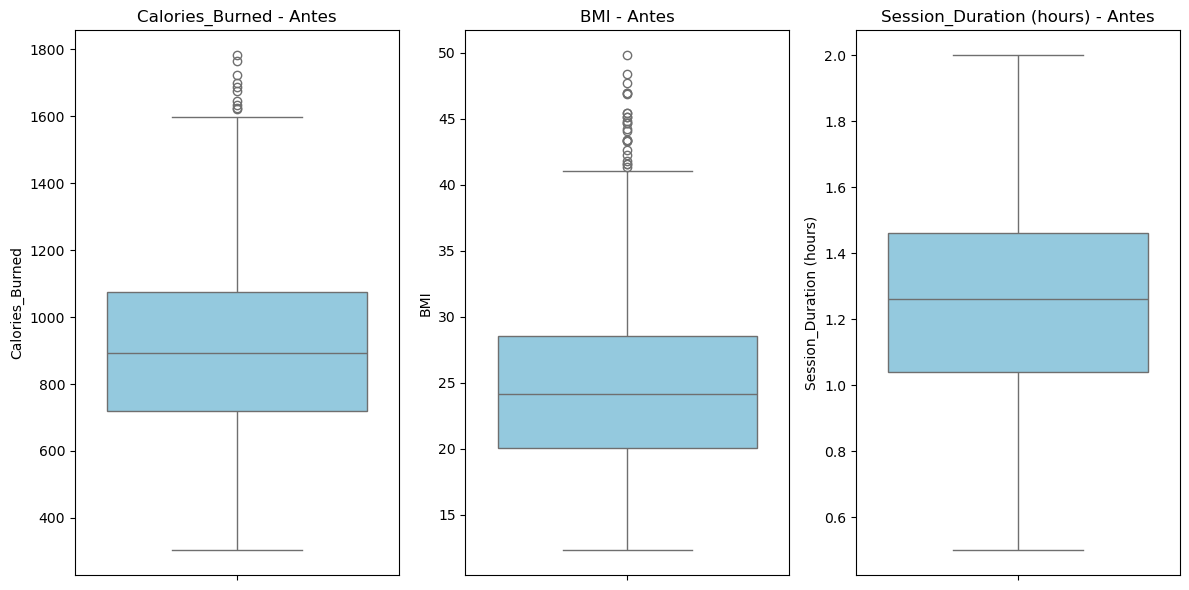

In [37]:
# Variables seleccionadas para la comparación
variables = ['Calories_Burned', 'BMI', 'Session_Duration (hours)']

# Antes de eliminar valores atípicos (dataset original)
plt.figure(figsize=(12, 6))
for i, col in enumerate(variables, 1):
    plt.subplot(1, len(variables), i)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'{col} - Antes')
plt.tight_layout()
plt.show()

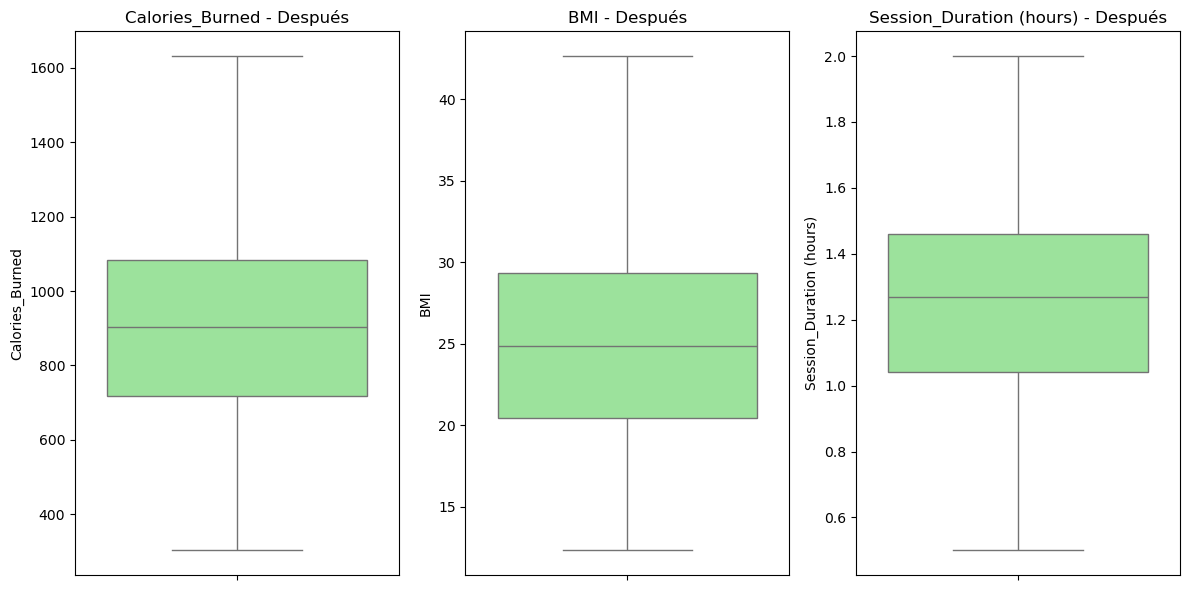

In [38]:
# Después de eliminar valores atípicos (dataset expandido)
plt.figure(figsize=(12, 6))
for i, col in enumerate(variables, 1):
    plt.subplot(1, len(variables), i)
    sns.boxplot(data=expanded_df, y=col, color='lightgreen')
    plt.title(f'{col} - Después')
plt.tight_layout()
plt.show()

Parte 4

In [25]:
print("\nEstadísticas descriptivas del dataset original:")
print(df.describe())


Estadísticas descriptivas del dataset original:
              Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
count  973.000000   973.000000   973.00000  973.000000  973.000000   
mean    38.683453    73.854676     1.72258  179.883864  143.766701   
std     12.180928    21.207500     0.12772   11.525686   14.345101   
min     18.000000    40.000000     1.50000  160.000000  120.000000   
25%     28.000000    58.100000     1.62000  170.000000  131.000000   
50%     40.000000    70.000000     1.71000  180.000000  143.000000   
75%     49.000000    86.000000     1.80000  190.000000  156.000000   
max     59.000000   129.900000     2.00000  199.000000  169.000000   

       Resting_BPM  Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
count   973.000000                973.000000       973.000000      973.000000   
mean     62.223022                  1.256423       905.422405       24.976773   
std       7.327060                  0.343033       272.641516        6.259419

In [26]:
# Estadísticas descriptivas del dataset expandido
print("\nEstadísticas descriptivas del dataset expandido:")
print(expanded_df.describe())


Estadísticas descriptivas del dataset expandido:
                Age   Weight (kg)    Height (m)       Max_BPM       Avg_BPM  \
count  99282.000000  99282.000000  99282.000000  99282.000000  99282.000000   
mean      38.663192     73.723305      1.721634    179.923813    143.771157   
std       12.174064     21.128164      0.127592     11.520390     14.332688   
min       18.000000     40.000000      1.500000    160.000000    120.000000   
25%       28.000000     58.100000      1.620000    170.000000    131.000000   
50%       40.000000     69.900000      1.710000    180.000000    143.000000   
75%       50.000000     85.900000      1.800000    190.000000    156.000000   
max       59.000000    129.900000      2.000000    199.000000    169.000000   

        Resting_BPM  Session_Duration (hours)  Calories_Burned  \
count  99282.000000              99282.000000     99282.000000   
mean      62.219395                  1.256965       901.922022   
std        7.310445                  0.3

In [27]:
# Comparativa de métricas (promedio y desviación estándar)
numeric_cols = ['Calories_Burned', 'BMI', 'Session_Duration (hours)']
comparison = pd.DataFrame({
    "Dataset Original (Promedio)": df[numeric_cols].mean(),
    "Dataset Expandido (Promedio)": expanded_df[numeric_cols].mean(),
    "Dataset Original (Std)": df[numeric_cols].std(),
    "Dataset Expandido (Std)": expanded_df[numeric_cols].std()
})
print("\nComparativa de métricas entre datasets:")
print(comparison)


Comparativa de métricas entre datasets:
                          Dataset Original (Promedio)  \
Calories_Burned                            905.422405   
BMI                                         24.912127   
Session_Duration (hours)                     1.256423   

                          Dataset Expandido (Promedio)  \
Calories_Burned                             901.922022   
BMI                                          24.917061   
Session_Duration (hours)                      1.256965   

                          Dataset Original (Std)  Dataset Expandido (Std)  
Calories_Burned                       272.641516               265.256240  
BMI                                     6.660879                 6.376991  
Session_Duration (hours)                0.343033                 0.343631  


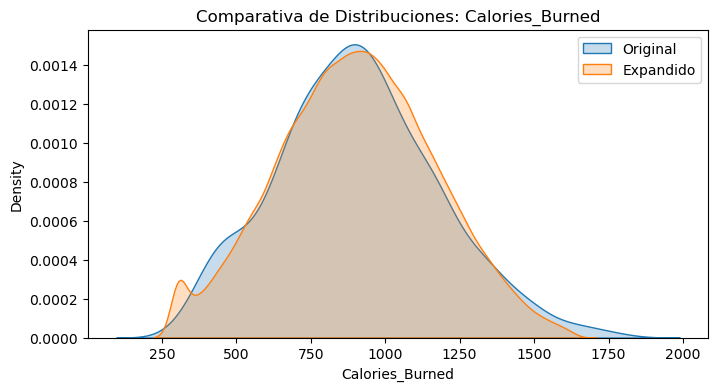

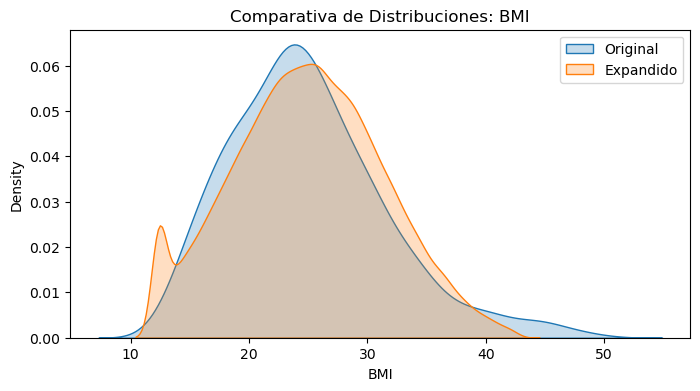

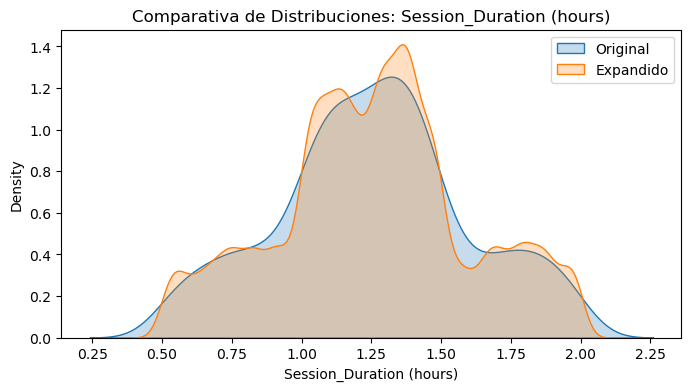

In [39]:
# Visualización de distribuciones actualizada
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df[col], label="Original", fill=True)  # Reemplazamos shade=True por fill=True
    sns.kdeplot(expanded_df[col], label="Expandido", fill=True)  # Reemplazamos shade=True por fill=True
    plt.title(f"Comparativa de Distribuciones: {col}")
    plt.legend()
    plt.show()
